<a href="https://colab.research.google.com/github/LeMinhTruong16/AI/blob/main/finalAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array

target_width = 40
target_height = 40
folder = '/content/drive/MyDrive/AI /FinalAl/datasets/'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('NonCorn'):
    output = 0.0
  if file.startswith('Healthy'):
    output = 1.0
  if file.startswith('CommonRust'):
    output = 2.0
  if file.startswith('LeafBlight '):
    output = 3.0

  img = load_img(folder + file, target_size = (target_width, target_height))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)

photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/AI /FinalAl/npy/corn_photos.npy', photos)
save('/content/drive/MyDrive/AI /FinalAl/npy/corn_labels.npy', labels)

(1028, 40, 40, 3) (1028,)


In [ ]:
# Split data into train & test (95-5)
split_index = int(0.05 * len(photos))
test_photos, test_labels = photos[:split_index], labels[:split_index]
train_photos, train_labels = photos[split_index:], labels[split_index:]

print(test_photos.shape, train_photos.shape)

(51, 40, 40, 3) (977, 40, 40, 3)


In [ ]:
train_photos = train_photos.reshape((977, target_width, target_height, 3))
train_photos = train_photos.astype('float32')/255

test_photos = test_photos.reshape((51, target_width, target_height, 3))
test_photos = test_photos.astype('float32')/255

In [ ]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels, 4)
test_labels = to_categorical(test_labels, 4)

In [ ]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam
from keras import losses
loss = losses
batch_size = 40
epochs = 5
classes = 4

In [ ]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (target_width, target_height, 3), padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))
# #Add Dropout
# model.add(Dropout(0.25))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
# #Add Dropout
# model.add(Dropout(0.25))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
# #Add Dropout
# model.add(Dropout(0.25))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(256, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
# #Add Dropout
# model.add(Dropout(0.25))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(512, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
# #Add Dropout
# model.add(Dropout(0.25))

In [ ]:
#Đưa vào ANN, bộ ANN để phân loại:
from keras.losses import categorical_crossentropy
model.add(Flatten())
model.add(Dense(1024, activation = 'linear'))

model.add(Dense(classes, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 40, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 40, 40, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        36928     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                        

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=90,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.3,
    zoom_range=0.3,
    channel_shift_range=0.0,
    fill_mode='nearest')
datagen.fit(train_photos)

In [ ]:

#Compile:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
train = model.fit(train_photos, train_labels, batch_size= batch_size, epochs= epochs, verbose= 1)

Epoch 1/5
25/25 [==============================] - 3s 13ms/step - loss: 0.1619 - accuracy: 0.9539
Epoch 2/5
25/25 [==============================] - 0s 10ms/step - loss: 0.0895 - accuracy: 0.9724
Epoch 3/5
25/25 [==============================] - 0s 10ms/step - loss: 0.0240 - accuracy: 0.9918
Epoch 4/5
25/25 [==============================] - 0s 10ms/step - loss: 0.0672 - accuracy: 0.9806
Epoch 5/5
25/25 [==============================] - 0s 10ms/step - loss: 0.1556 - accuracy: 0.9406


In [ ]:
# Evaluate model
test_loss, test_acc = model.evaluate(test_photos, test_labels)
print('Test accuracy:', test_acc)

2/2 [==============================] - 0s 12ms/step - loss: 1.1020 - accuracy: 0.8431
Test accuracy: 0.843137264251709


1/1 [==============================] - 0s 25ms/step
CommonRust


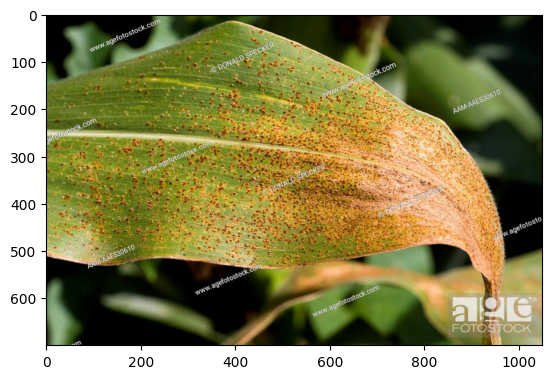

1/1 [==============================] - 0s 37ms/step
Bó Tay


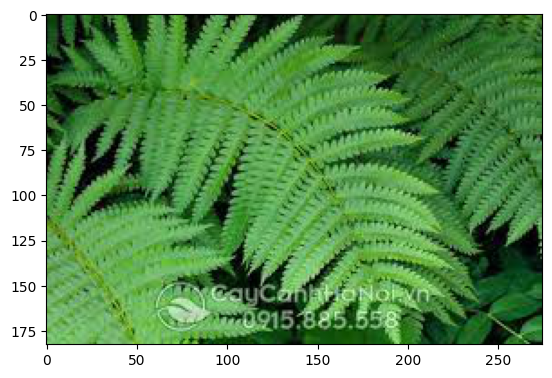

1/1 [==============================] - 0s 20ms/step
LeafBlight


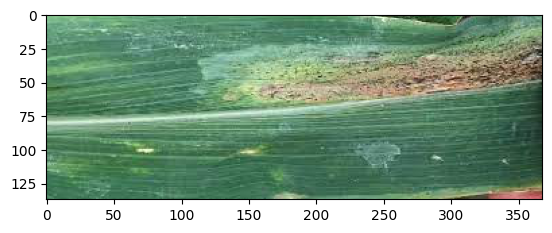

1/1 [==============================] - 0s 21ms/step
Healthy


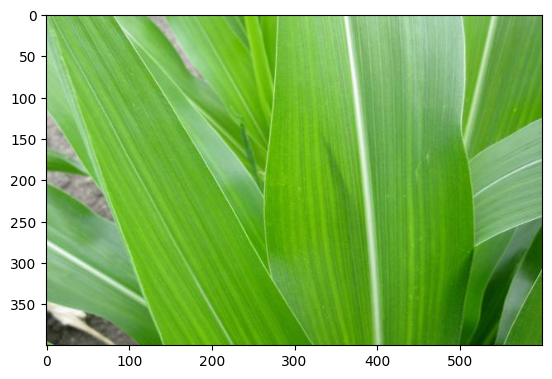

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array

path = '/content/drive/MyDrive/AI /FinalAl/testImage/'

for file in listdir(path):
  photo = load_img(path  +  file)
  plt.imshow(photo)

  photo = load_img(path + file, target_size = (40, 40))
  photo = img_to_array(photo)
  photo = photo.astype('float32')
  photo = photo/255
  photo = np.expand_dims(photo,axis=0)

  result=(model.predict(photo).argmax())
  class_name=['Bó Tay','Healthy', 'CommonRust', 'LeafBlight']
  print(class_name[result])
  plt.show()

In [ ]:
from keras.models import load_model

model.save('/content/drive/MyDrive/AI /FinalAl/model/model_Corn_Disease.h5')